# Elements of Convex Optimization 2024 - Homework 3

### Solution author: <Kuba Czech, 156035>

The purpose of this notebook is to implement Gradient Descent.
The notebook uses helper functions to plot functions (in [eco_hw3_helpers.py](eco_hw3_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib**, **seaborn** and **[autograd](https://github.com/HIPS/autograd)** libraries.


In [1]:
#!pip install numpy matplotlib seaborn autograd

In [2]:
# This line makes the graphs show up in the notebook, so you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports (for drawing):
from eco_hw3_helpers import plot_steps_1d, plot_steps_2d

import numpy as np
from autograd import grad
import autograd.numpy as anp


## Sample random walk for presentation


In [4]:
# Takes initial point and function (ignores function) and takes 10 random steps
# Tt works regardless of dimensionality
def random_walk(f, x0, steps=10):
    x = np.array(x0)
    points = [x]
    for _ in range(steps):
        x = x + (np.random.random(np.shape(x)) - 0.5) * 2
        points.append(x)
    return points

## Plotting 1D function

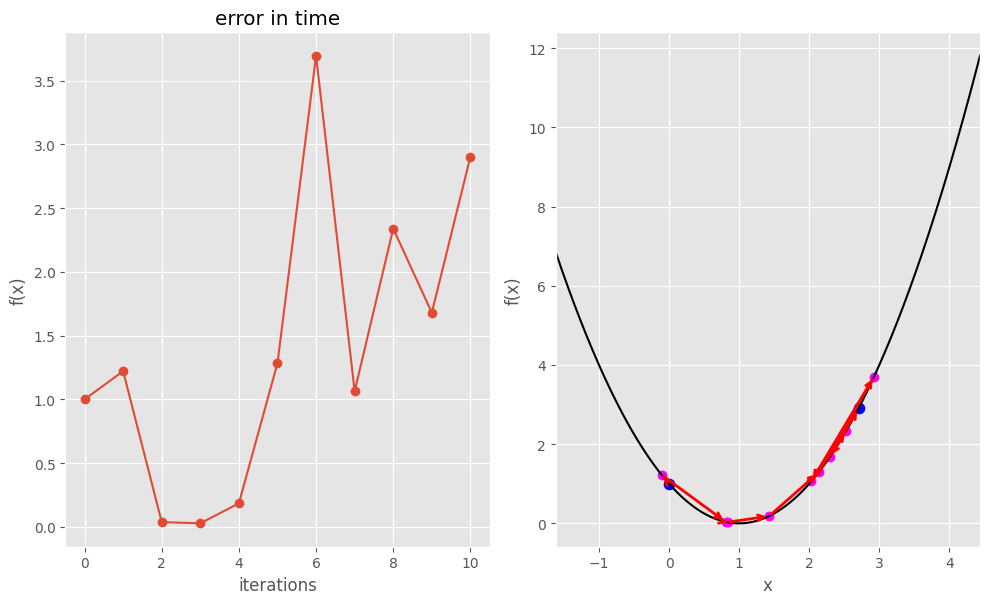

In [6]:
f = lambda x: (x - 1) ** 2
x0 = 0.0
points = random_walk(f, x0)
plot_steps_1d(f, points)

## Plotting 2D function

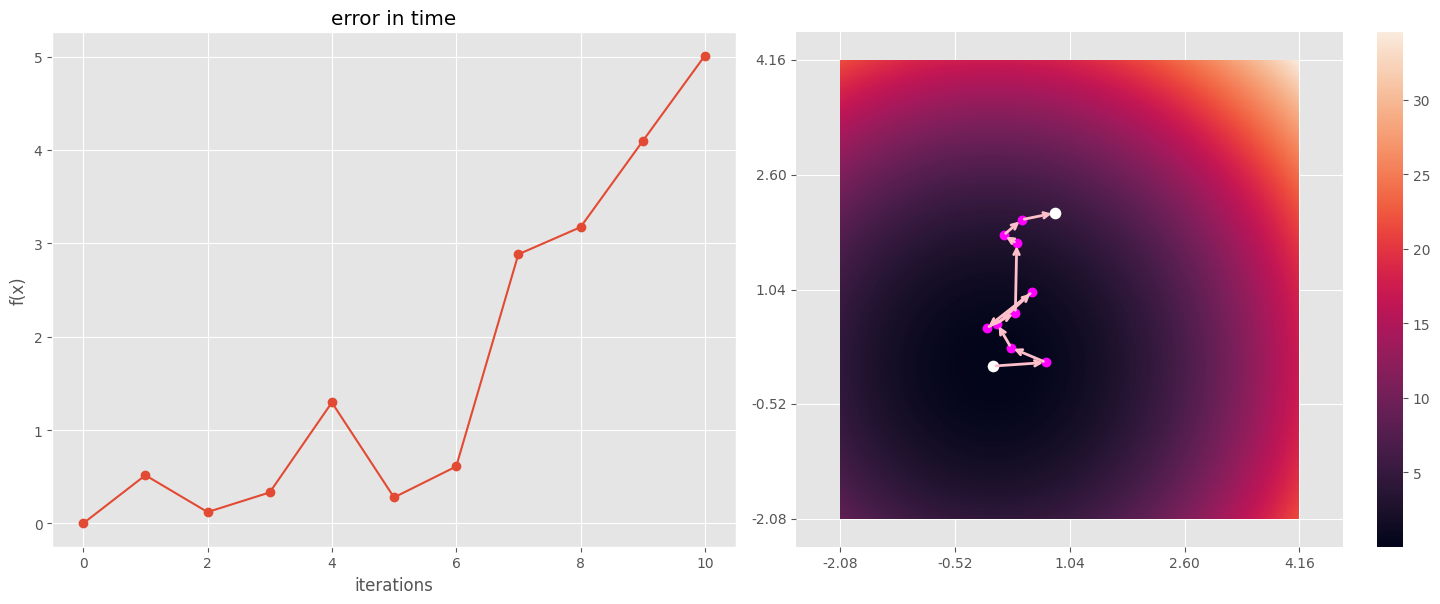

In [7]:
f = lambda x: x @ x
x0 = np.zeros(2)
points = random_walk(f, x0)
plot_steps_2d(f, points)

## Task 1

Implement gradient descent method with the constant learning rate, that does specified number of steps. Use autograd library (`grad` function) to calculate the gradient of the function.

In [97]:
from autograd import grad

def gd(f, x0, learning_rate=0.1, steps=10):
    x = np.array(x0)
    points = [x]
    for i in range(steps):
        dx = grad(f)
        gradients = dx(x)
        x = x - learning_rate * gradients
        points.append(np.array(x))
    return points    


### Test it for simple 1D functions

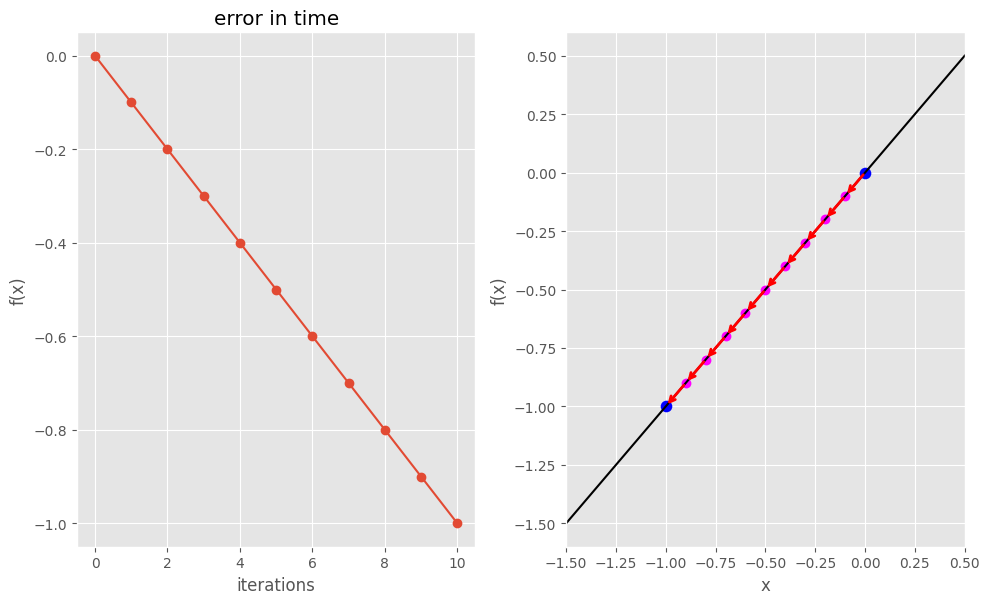

In [98]:
f = lambda x: (x-1) ** 2
f = lambda x: -(x - 1) ** 2
f = lambda x: x
# f = lambda x: (x - 1) ** 2 + 4 * (0.5 * anp.sin((x - 1) * 10)) ** 2

x0 = 0.0
points = gd(f, x0, learning_rate=0.1, steps=10)
plot_steps_1d(f, points)


### Test if i works for 2D functions as well


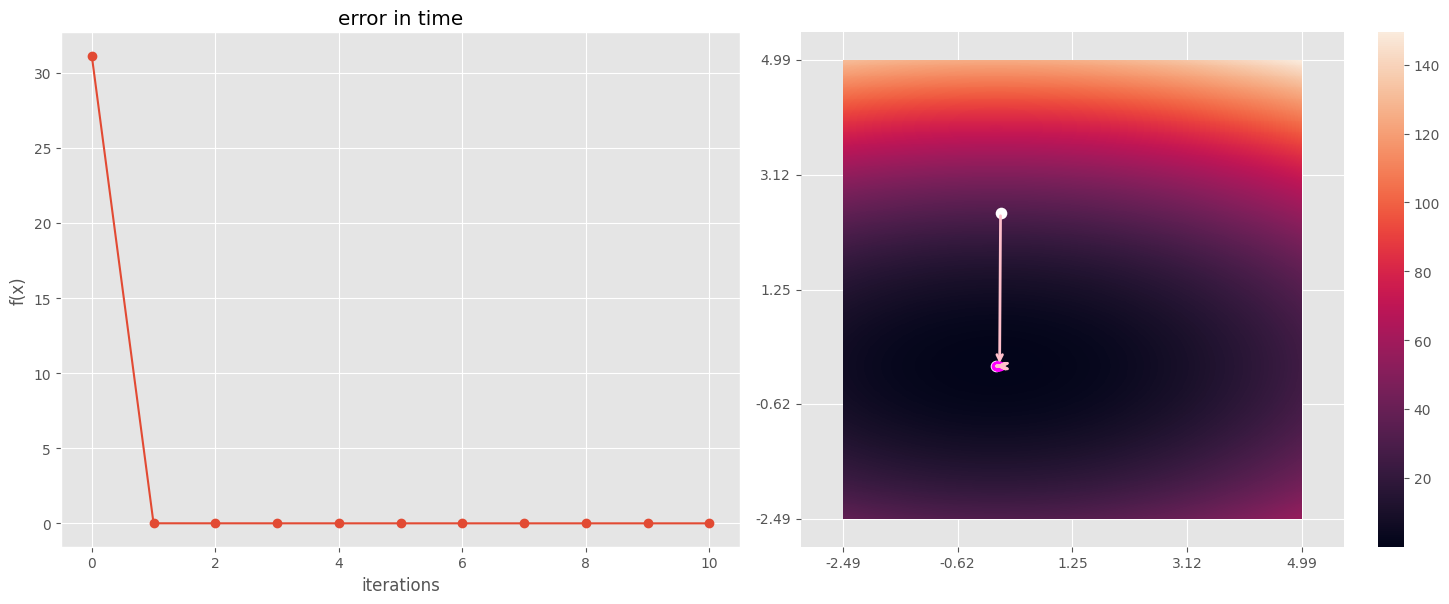

In [29]:
f = lambda x:  x @ x
f = lambda x: -x @ x
f = lambda x: np.array([1,2]) * x @ x
f = lambda x: np.array([1,5]) * x @ x

x0 = np.random.random(2)*6 - 3
points = gd(f, x0, learning_rate=0.1, steps=10)
plot_steps_2d(f, points)

## Task 2

Implement Cauchy method for 2D functions and compare it to gd

Question: Why is it pointless to implement 1D version?

**Answer: First of all, because there are better methods (dedicated) to find minimum of 1D function, which is in much simpler search space than multidimensional. 
It also doesn't give us much advantage over existing methods for 1D search**

Implementation hint: You may reuse 1D optimization method implementations (for first homework) to find best eta in each step.

In [99]:
def bisection_search(function):
    n = 10
    a, b = (0, 1)
    for i in range(n):
        m = (a+b)/2
        f_der = grad(function)
        f_der = f_der(m) 
        if (f_der == 0):
            return m
        elif (f_der < 0):
            a = m
        else:
            b = m
    return (a+b)/2

def cauchy(f, x0):
    x = np.array(x0)
    points = [x]
    for _ in range(10):
        derivatives = grad(f)
        gradients = derivatives(x)

        learning_rate = bisection_search(lambda alpha: f(x - alpha * gradients))
        x = x - learning_rate * gradients

        points.append(np.array(x))
    return points    

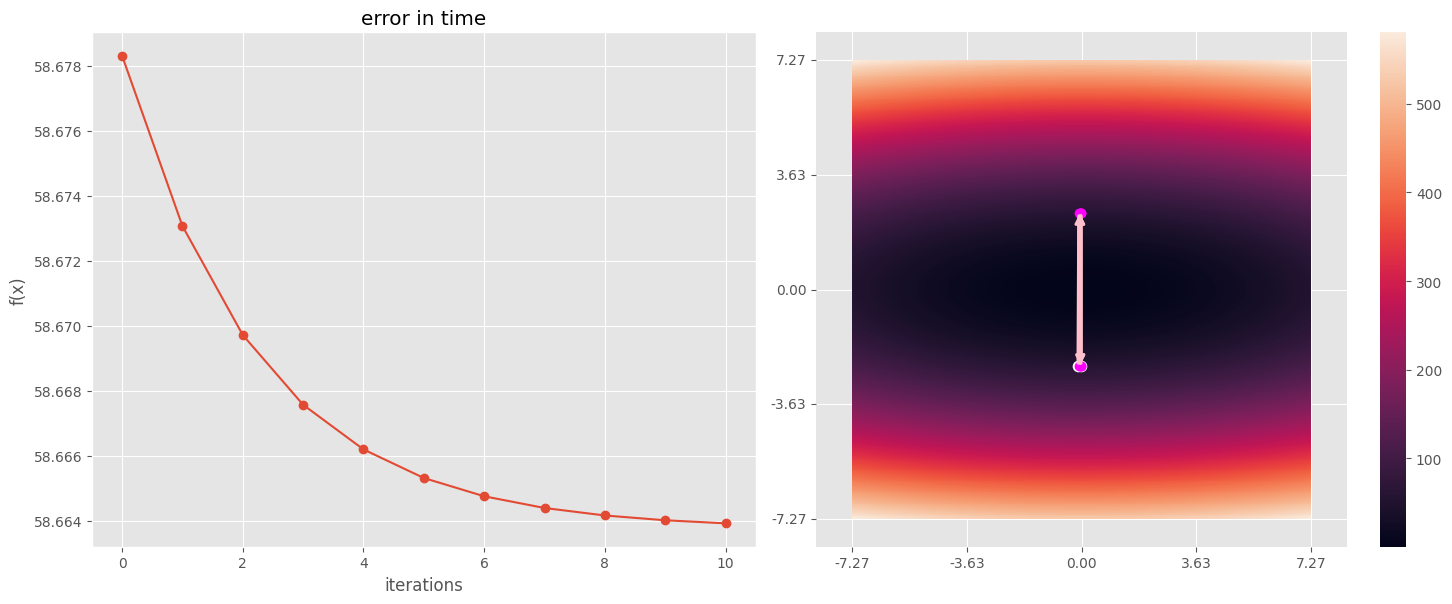

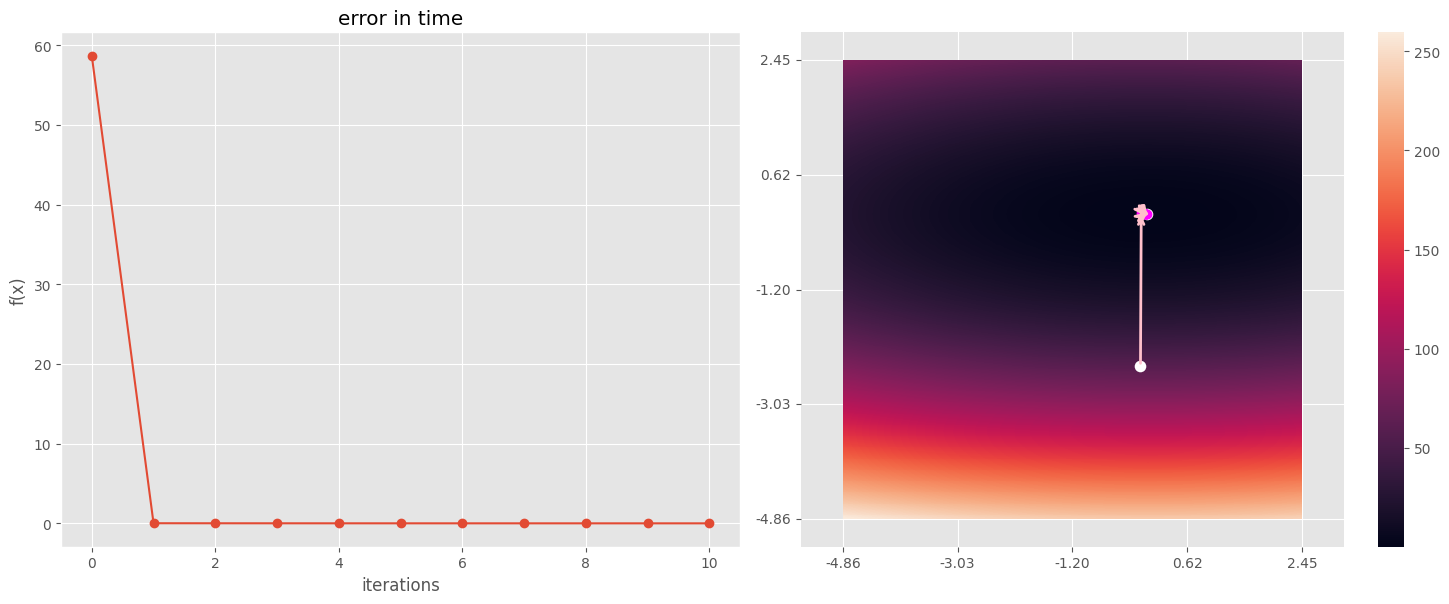

In [100]:
f = lambda x: x @ x
f = lambda x: -x @ x
f = lambda x: np.array([1,2]) * x @ x
f = lambda x: np.array([1,10]) * x @ x

x0 = np.random.random(2)*6 - 3
gd_points = gd(f, x0, learning_rate=0.1)
cauchy_points = cauchy(f, x0)
plot_steps_2d(f, gd_points)
plot_steps_2d(f, cauchy_points)

0.04509963858131901 0.0
-467.34206540197664 -42228645228.04694
0.012119972473933417 1.0332773745405574e-11
38.52648594106191 0.00011583879331458835


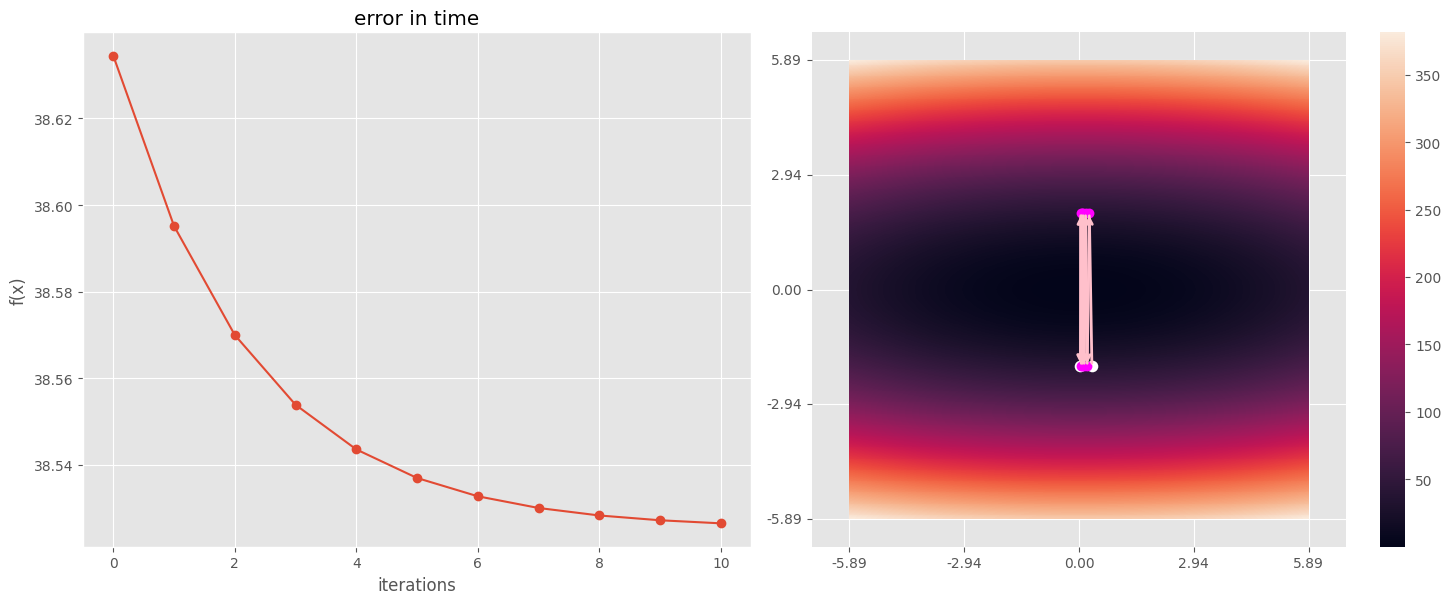

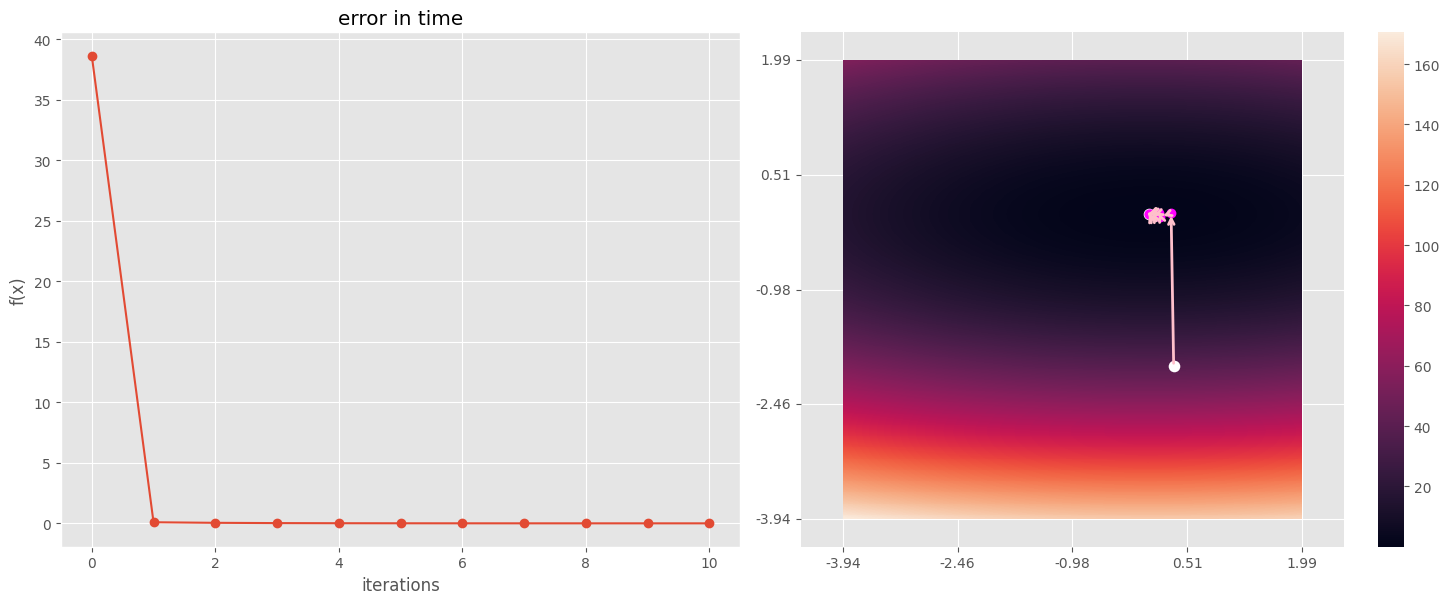

In [101]:
f1 = lambda x: x @ x
f2 = lambda x: -x @ x
f3 = lambda x: np.array([1,2]) * x @ x
f4 = lambda x: np.array([1,10]) * x @ x

for f in [f1, f2, f3, f4]:
    x0 = np.random.random(2)*6 - 3
    gd_points = gd(f, x0, learning_rate=0.1)
    final_gd = gd_points[-1]
    cauchy_points = cauchy(f, x0)
    final_cauchy = cauchy_points[-1]
    print(f(final_gd), f(final_cauchy))
plot_steps_2d(f, gd_points)
plot_steps_2d(f, cauchy_points)